In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import Graph, CPD


def custom_comparison(node1, node2):
    if abs(node1 - node2) <= 1:
        return True
    else:
        return False

In [ ]:
def generate_data():
    normal_set1 = np.random.normal(loc=15, scale=5, size= 200)
    normal_set2 = np.random.normal(loc=60, scale=10, size= 150)

    uniform_set1 = np.random.uniform(low=-1, high=1, size= 300)
    uniform_set2 = np.random.uniform(low=-5, high=5, size=300 )
    
    exponential_set = np.random.exponential(scale=1, size=150)
    gamma_set = np.random.gamma(shape=2, scale=2, size=150)
    lognormal_set = np.random.lognormal(mean=0, sigma=1, size=150)
    binomial_set = np.random.binomial(n=10, p=0.5, size=150)
    poisson_set = np.random.poisson(lam=5, size=150)
    discrete_uniform_set = np.random.randint(low=1, high=10, size=150)


    dataset = np.concatenate([lognormal_set, normal_set2], axis=0)

    return dataset

In [2]:
def normal_data():
    normal_max_z = []
    for i in range(1, 1000):
        normal_data = np.random.lognormal(mean=0, sigma=1, size=300)
        normal_z = []
        normal_graph = Graph(normal_data, custom_comparison)
        normal_CPD = CPD(normal_graph)
        for i in range(1, len(normal_data)):
            normal_z.append(normal_CPD.calculation_z(i))
        normal_max_z.append(max(normal_z))
    return normal_max_z\


def combination_data():
    data_max_z = []
    for i in range(1, 1000):
        data = generate_data()
        data_z = []
        graph = Graph(data, custom_comparison)
        CPD = CPD(graph)
        for i in range(1, len(data)):
            data_z.append(CPD.calculation_z(i))
        data_max_z.append(max(data_z))
    return data_max_z

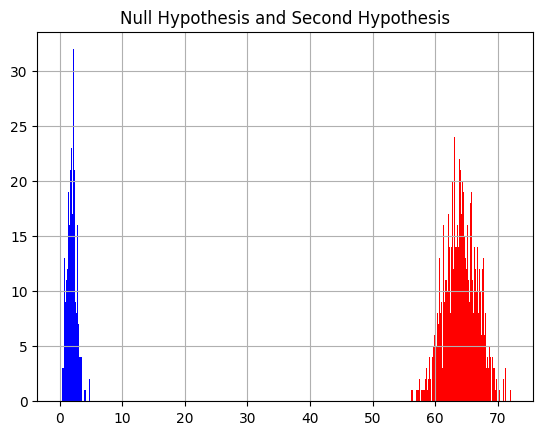

In [3]:
plt.hist(normal_data(), bins=150, color = 'blue', alpha = 1)
plt.hist(combination_data(), bins=150, color = 'red', alpha = 1)
plt.title('Null Hypothesis and Second Hypothesis')
plt.grid(True)